In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
X = pd.read_csv('Train.csv').values

In [71]:
y = X[:,5]
X = X[:,:5]

In [72]:
X

array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [73]:
y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [74]:
#Normalisation
u = X.mean()
std = X.std()
X = (X-u)/std

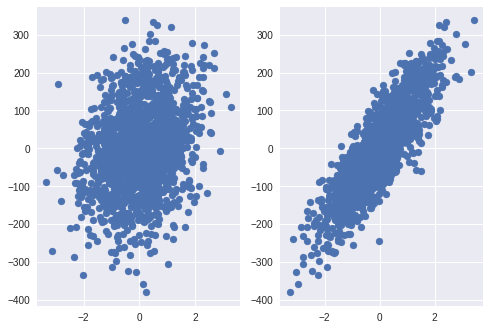

In [75]:
plt.style.use('seaborn')
plt.subplot(1,2,1)
plt.scatter(X[:,0],y)
plt.subplot(1,2,2)
plt.scatter(X[:,1],y)
plt.show()

In [76]:
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))

In [77]:
def hypothesis(X,theta):
    return np.dot(X,theta)

def error(X,y,theta):
    error = 0.0 
    m = X.shape[0]
    y_ = hypothesis(X,theta)
    e = np.sum((y-y_)**2)
    return e/m

def gradient(X,y,theta):
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-y))
    m = X.shape[0]
    return grad/m 

def gradient_descent(X,y,learning_rate=0.1,max_iters=500):
    n = X.shape[1]
    theta = np.zeros((n,))
    error_list = [] 
    for i in range(max_iters):
        e = error(X,y,theta)
        error_list.append(e)
        # Gradient Descent 
        grad = gradient(X,y,theta)
        theta = theta - learning_rate*grad 
    return theta,error_list

In [78]:
theta,error_list = gradient_descent(X,y)

In [79]:
y_ = []

for i in range (X.shape[0]):
    pred = hypothesis(X[i],theta)
    y_.append(pred)
y_ = np.array(y_)

In [80]:
def r2_score(y,y_):
    num = np.sum((y-y_)**2)
    denom = np.sum((y-y.mean())**2)
    score = (1-num/denom)
    return score*100 

In [81]:
r2_score(y,y_)

96.60939669975616

In [97]:
# Predictions on test data 
df= pd.read_csv('Test.csv')
X_test = df.values

In [100]:
twos=np.ones((X_test.shape[0],1))
X_test=np.hstack((twos,X_test))

In [101]:
# Predictions
y_test = []

for i in range (X_test.shape[0]):
    pred = hypothesis(X_test[i],theta)
    y_test.append(pred)
y_test = np.array(y_test)

In [102]:
y_test = pd.DataFrame(y_test,columns=["target"])

In [103]:
y_test.to_csv("Result.csv",index=True)

In [104]:
X_test.shape[0]

400

In [105]:
X.shape

(400, 5)